# 라이브러리 선언

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

In [4]:
# 데이터 불러오기

In [5]:
secondStepDf = pd.read_csv("../test/Financial_Product_Recommendation.csv")

In [6]:
secondStepDf

,FINANCIALPRODUCT,GENDER,AGE,CUST_TYPE,INCOME,FOREINERINDEX
0,급여계좌,0,2,0,5,0
1,신용카드,0,2,0,5,0
2,신용카드,0,3,0,5,1
3,증권,0,3,0,5,1
4,급여계좌,1,3,0,3,1
...,...,...,...,...,...,...
547143,급여계좌,0,5,0,5,1
547144,급여계좌,1,3,0,4,1
547145,주니어계좌,0,1,0,3,1
547146,급여계좌,1,2,0,5,0


# 컬럼명 설정

### 상품 가입자만 조회

In [7]:
secondStepDf = secondStepDf.loc[secondStepDf.FINANCIALPRODUCT != "0"]

In [8]:
secondStepDf = secondStepDf.reset_index(drop=True)

### feature, label 선언

In [9]:
secondStepDf.columns

Index(['FINANCIALPRODUCT', 'GENDER', 'AGE', 'CUST_TYPE', 'INCOME',
       'FOREINERINDEX'],
      dtype='object')

In [10]:
feature = ['GENDER', 'AGE', 'CUST_TYPE', 'INCOME', 'FOREINERINDEX']

In [11]:
label = ['FINANCIALPRODUCT']

In [12]:
featureData = secondStepDf.loc[:,feature]
labelData = secondStepDf.loc[:,label]

### 학습, 훈련 분리

In [13]:
training_feature,\
test_feature,\
training_label,\
test_label = train_test_split(featureData, labelData, test_size=0.3, random_state=10)

In [14]:
print(training_feature.shape)
print(training_label.shape)
print(test_feature.shape)
print(test_label.shape)

(383003, 5)
(383003, 1)
(164145, 5)
(164145, 1)


# 모델 선언

In [21]:
model = DecisionTreeClassifier(random_state = 10, max_depth=11)

### 학습

In [22]:
model.fit(X = training_feature,
          y = training_label)

DecisionTreeClassifier(max_depth=11, random_state=10)

### 예측

In [23]:
pred_tree = model.predict(X=test_feature) #타입:np.array

pred_tree = pd.DataFrame(pred_tree, columns=["pred_tree"])

test_label = test_label.reset_index(drop=True)

accuracy_tree = accuracy_score(test_label, pred_tree)

In [24]:
accuracy_tree

0.45331261993968747

In [19]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [ ]:
# Grid_search를 이용한 최적의 hyperparameter를 찾는다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 로드
X = training_feature
y = training_label

# 의사 결정 트리 분류기 생성
dt_classifier = DecisionTreeClassifier()

# 튜닝할 하이퍼파라미터와 범위 정의
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# 그리드 서치를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터와 정확도 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [ ]:
--

# 시각화

[Text(0.4375, 0.9, 'AGE <= 1.5\ngini = 0.756\nsamples = 383003\nvalue = [150479, 72806, 67789, 15992, 44857, 31080]'),
 Text(0.20833333333333334, 0.7, 'GENDER <= 0.5\ngini = 0.0\nsamples = 15972\nvalue = [0, 0, 2, 15970, 0, 0]'),
 Text(0.16666666666666666, 0.5, 'AGE <= 0.5\ngini = 0.0\nsamples = 8187\nvalue = [0, 0, 2, 8185, 0, 0]'),
 Text(0.08333333333333333, 0.3, 'INCOME <= 4.5\ngini = 0.001\nsamples = 1470\nvalue = [0, 0, 1, 1469, 0, 0]'),
 Text(0.041666666666666664, 0.1, '\n  (...)  \n'),
 Text(0.125, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.3, 'INCOME <= 4.5\ngini = 0.0\nsamples = 6717\nvalue = [0, 0, 1, 6716, 0, 0]'),
 Text(0.20833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.2916666666666667, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 7785\nvalue = [0, 0, 0, 7785, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'AGE <= 3.5\ngini = 0.736\nsamples = 367031\nvalue = [150479, 72806, 67787, 22, 44857, 31080]'),
 Text(0.5, 0.5, 'AGE <= 2.5\ngini = 0.511\nsamples = 82981\nvalue 

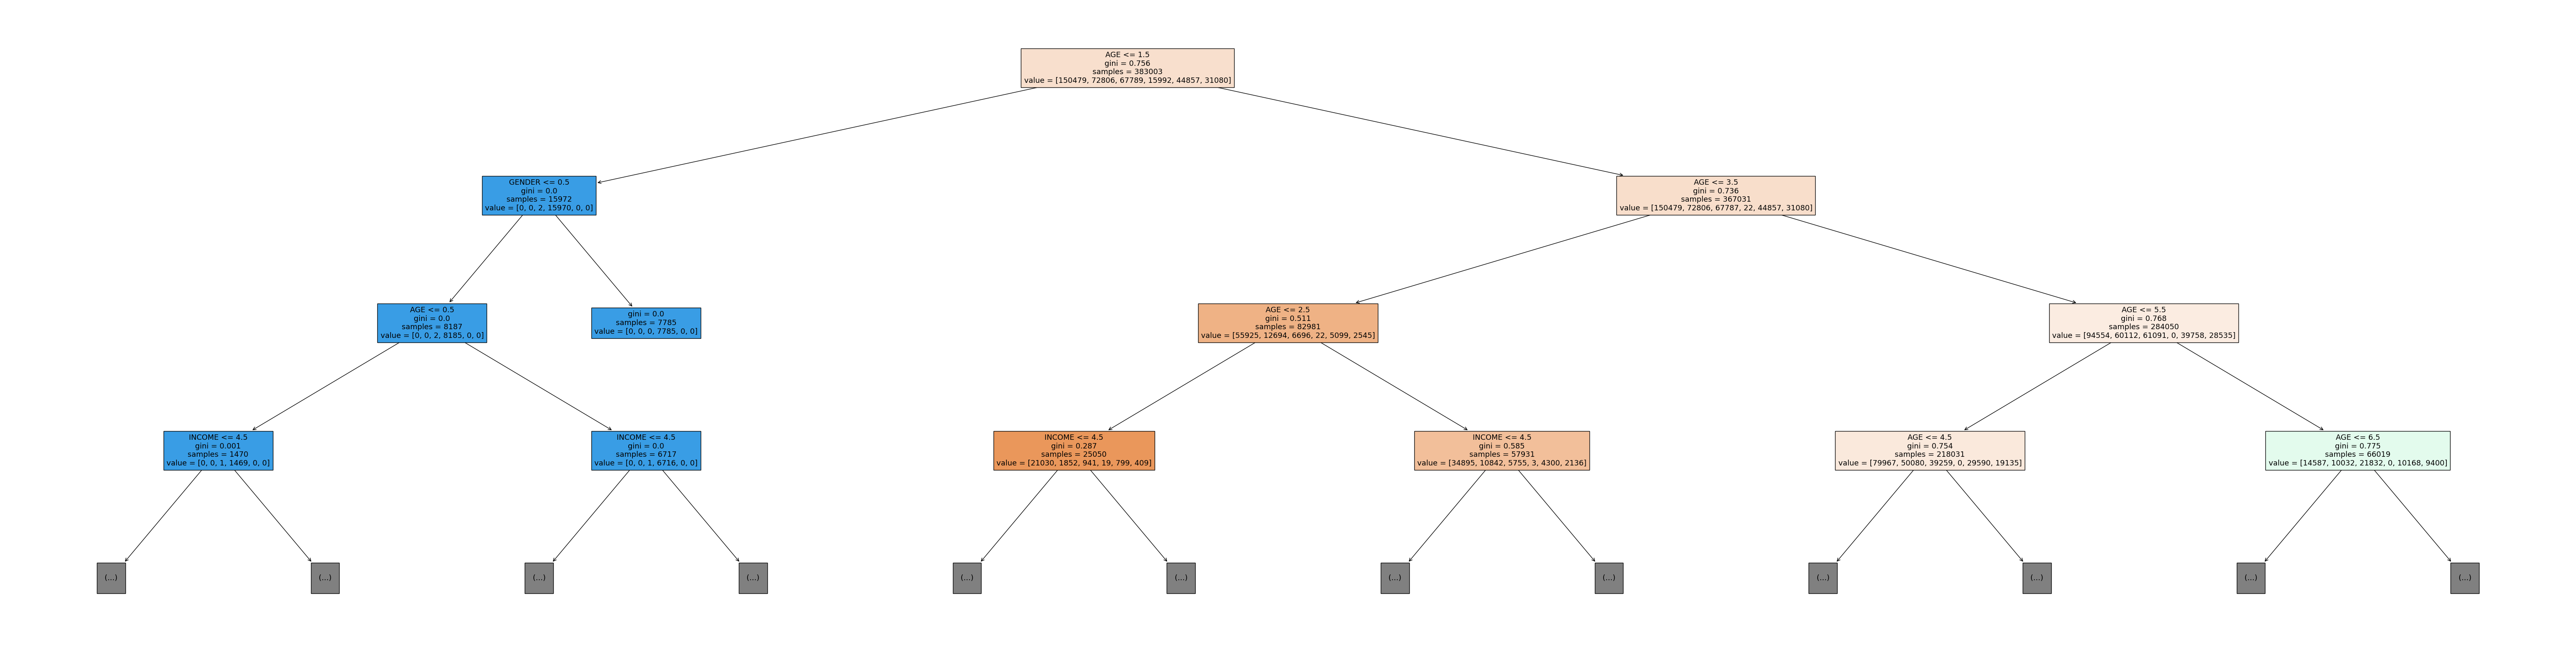

In [27]:
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=training_feature.columns, max_depth=3, filled=True)

# pickle 저장

In [28]:
# test
with open("../test/tree_model.pickle","wb") as fw:
    pickle.dump(model,fw)

In [ ]:
-

In [ ]:
# 실전
with open("./tree_model.pickle","wb") as fw:
    pickle.dump(model,fw)